<a href="https://colab.research.google.com/github/lookB4Uleap/GRIP_AUGUST_2021/blob/main/GRIP_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP - Data Science And Business Analytics - Task 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_path = '/content/drive/My Drive/'
os.chdir(root_path)

Mounted at /content/drive


# Importing the dataset

In [ ]:
df = pd.read_csv('Internship/Sparks-GRIP/scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Visualizing the dataset 

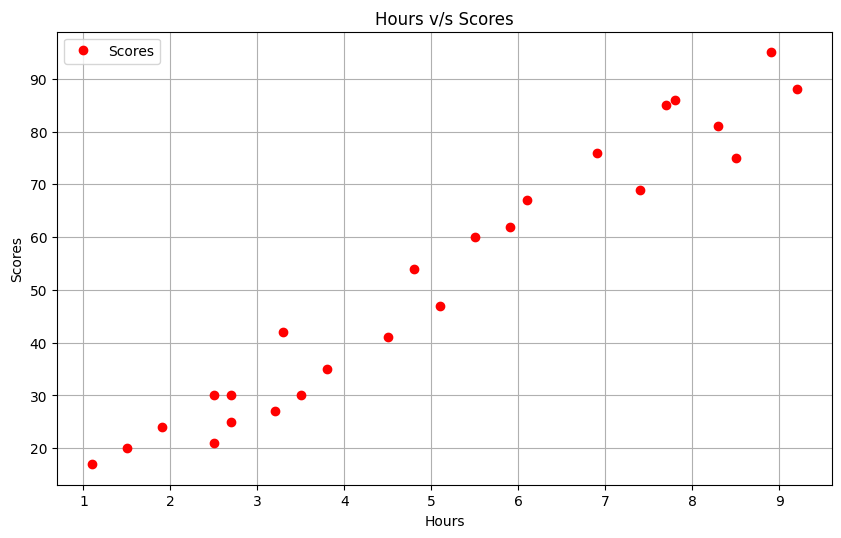

In [ ]:
plt.figure(figsize=(10,6), dpi = 100)
plt.plot(df['Hours'].tolist(), df['Scores'].tolist(), 'ro', label = 'Scores')
plt.title('Hours v/s Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.legend()
plt.show()

# Preparing the data




In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Splitting the data into training and testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("Training features : \n", X_train)
print("Testing features : \n", X_test)
print("Training labels : ", y_train)
print("Testing labels : ", y_test)

Training features : 
 [[2.7]
 [3.3]
 [5.1]
 [3.8]
 [1.5]
 [3.2]
 [4.5]
 [8.9]
 [8.5]
 [3.5]
 [2.7]
 [1.9]
 [4.8]
 [6.1]
 [7.8]
 [5.5]
 [7.7]
 [1.1]
 [7.4]
 [9.2]]
Testing features : 
 [[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]
Training labels :  [25 42 47 35 20 27 41 95 75 30 30 24 54 67 86 60 85 17 69 88]
Testing labels :  [81 30 21 76 62]


# Training the linear regression model 

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Ploting the regression line

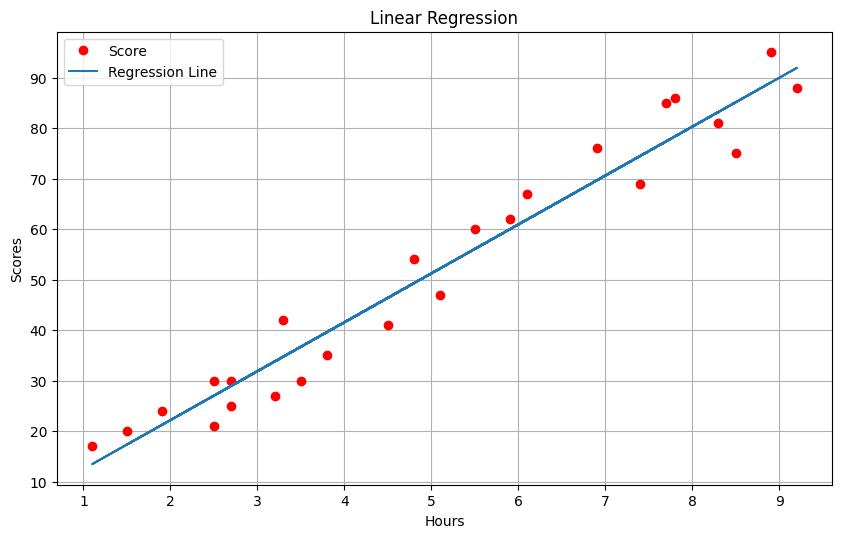

In [ ]:
line = reg.coef_ * X + reg.intercept_
plt.figure(figsize=(10,6), dpi = 100)
plt.plot(X, y, 'ro', label = 'Score')
plt.plot(X, line, label = 'Regression Line')
plt.title('Linear Regression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.legend()
plt.show()

# Analyzing actual data vs predicted data

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
pred_df['Difference'] = abs(pred_df['Actual'] - pred_df['Predicted'])
pred_df 

,Actual,Predicted,Difference
0,81,83.188141,2.188141
1,30,27.032088,2.967912
2,21,27.032088,6.032088
3,76,69.633232,6.366768
4,62,59.951153,2.048847


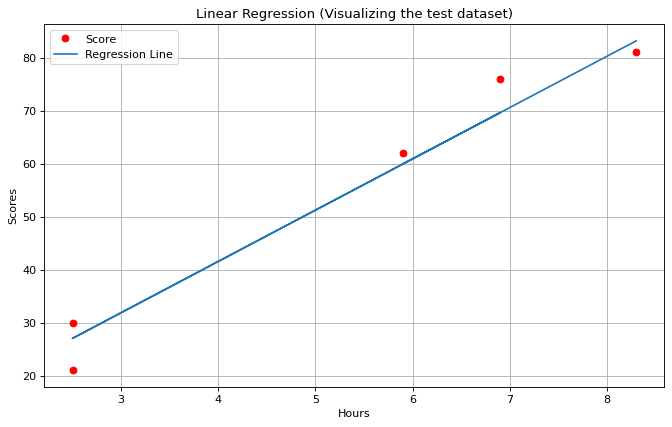

In [ ]:
line_test = reg.coef_ * X_test + reg.intercept_
plt.figure(figsize=(10,6), dpi = 80)
plt.plot(X_test, y_test, 'ro', label = 'Score')
plt.plot(X_test, line_test, label = 'Regression Line')
plt.title('Linear Regression (Visualizing the test dataset)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.legend()
plt.show()

# Evaluating the model

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error : {:.4f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error : {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error : 3.9208
Mean Squared Error : 18.9432


# Making a prediction

In [ ]:
hrs_studied_per_day = 9.25
predicted_score = reg.predict([[hrs_studied_per_day]])
print("Predicted Score : {:.4f}".format(predicted_score[0]))

Predicted Score : 92.3861
